# 6. Homework – Comparing Clustering Algorithms

**Nikos Kordalis**

**Question 1: Extend the K-means clustering to use different numbers of clusters (3, 5, 10, 20, etc). What number of clusters do you think best captures the diversity in the data? Why? Explain your reasoning and show plots to justify your conclusions (25 points).**

In [2]:
import json
import pandas as pd
import numpy as np
import geopandas as gpd
crs = {'init': 'epsg:4326'}

import shapely.wkt
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm

def colorbar_cartopy(mappable, cmap, **kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)   
    cax = divider.append_axes("right", size="2%", pad=0.05, axes_class=plt.Axes, autoscale_on=False)
    obj = fig.colorbar(cmap, cax=cax, **kwargs)
    return obj 

fid = 'USGS_Quakes_1999-2019.csv'
df = pd.read_csv(fid, usecols=['geometry', 'mag', 'time', 'felt'])
geom = [shapely.wkt.loads(wkt) for wkt in df.geometry.values]
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geom)
del df

#gdf.plot(figsize=(15,10))

In [3]:
gdf

felt                                  geometry   mag           time
0        NaN     POINT Z (-72.20800 -31.18800 1.10000)  4.30   917824828230
1        NaN      POINT Z (55.04400 27.56100 33.00000)  3.90   917823112290
2        NaN    POINT Z (-71.51000 -33.14800 54.80000)  3.30   917822671850
3        NaN       POINT Z (22.68000 38.83000 9.00000)  3.10   917822192600
4        NaN      POINT Z (14.79000 46.04600 10.00000)  2.50   917819540740
...      ...                                       ...   ...            ...
516746   NaN    POINT Z (-153.19530 56.02090 26.60000)  3.00  1556679638311
516747   1.0  POINT Z (-175.66900 -20.24210 194.67000)  4.80  1556671282320
516748  36.0     POINT Z (-123.24267 39.34450 4.41000)  2.73  1556670388470
516749   NaN     POINT Z (-68.19980 18.24630 83.00000)  2.93  1556670147940
516750   NaN     POINT Z (-117.45750 39.79930 4.50000)  3.10  1556669648950

[516751 rows x 4 columns]

In [5]:
#Add an explicit depth field  
gdf['depth'] = list(map(lambda x: x.x, geom))

In [170]:
#Standardization
gdf['depth_standard'] = (gdf.depth - np.nanmean(gdf.depth)) / np.nanstd(gdf.depth)
gdf['mag_standard'] = (gdf.mag - np.nanmean(gdf.mag)) / np.nanstd(gdf.mag)

In [171]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
n_init = 100
n_clusters3 = 3
clf3 = KMeans(init='k-means++', n_init=n_init, n_clusters=n_clusters3,random_state=100, max_iter=1000)
labels3 = clf3.fit_predict(gdf[['mag_standard', 'depth_standard']])

n_clusters5 = 5
clf5 = KMeans(init='k-means++', n_init=n_init, n_clusters=n_clusters5,random_state=100, max_iter=1000)
labels5 = clf5.fit_predict(gdf[['mag_standard', 'depth_standard']])

n_clusters10 = 10
clf10 = KMeans(init='k-means++', n_init=n_init, n_clusters=n_clusters10,random_state=100, max_iter=1000)
labels10 = clf10.fit_predict(gdf[['mag_standard', 'depth_standard']])

n_clusters20 = 20
clf20 = KMeans(init='k-means++', n_init=n_init, n_clusters=n_clusters20,random_state=100, max_iter=1000)
labels20 = clf20.fit_predict(gdf[['mag_standard', 'depth_standard']])

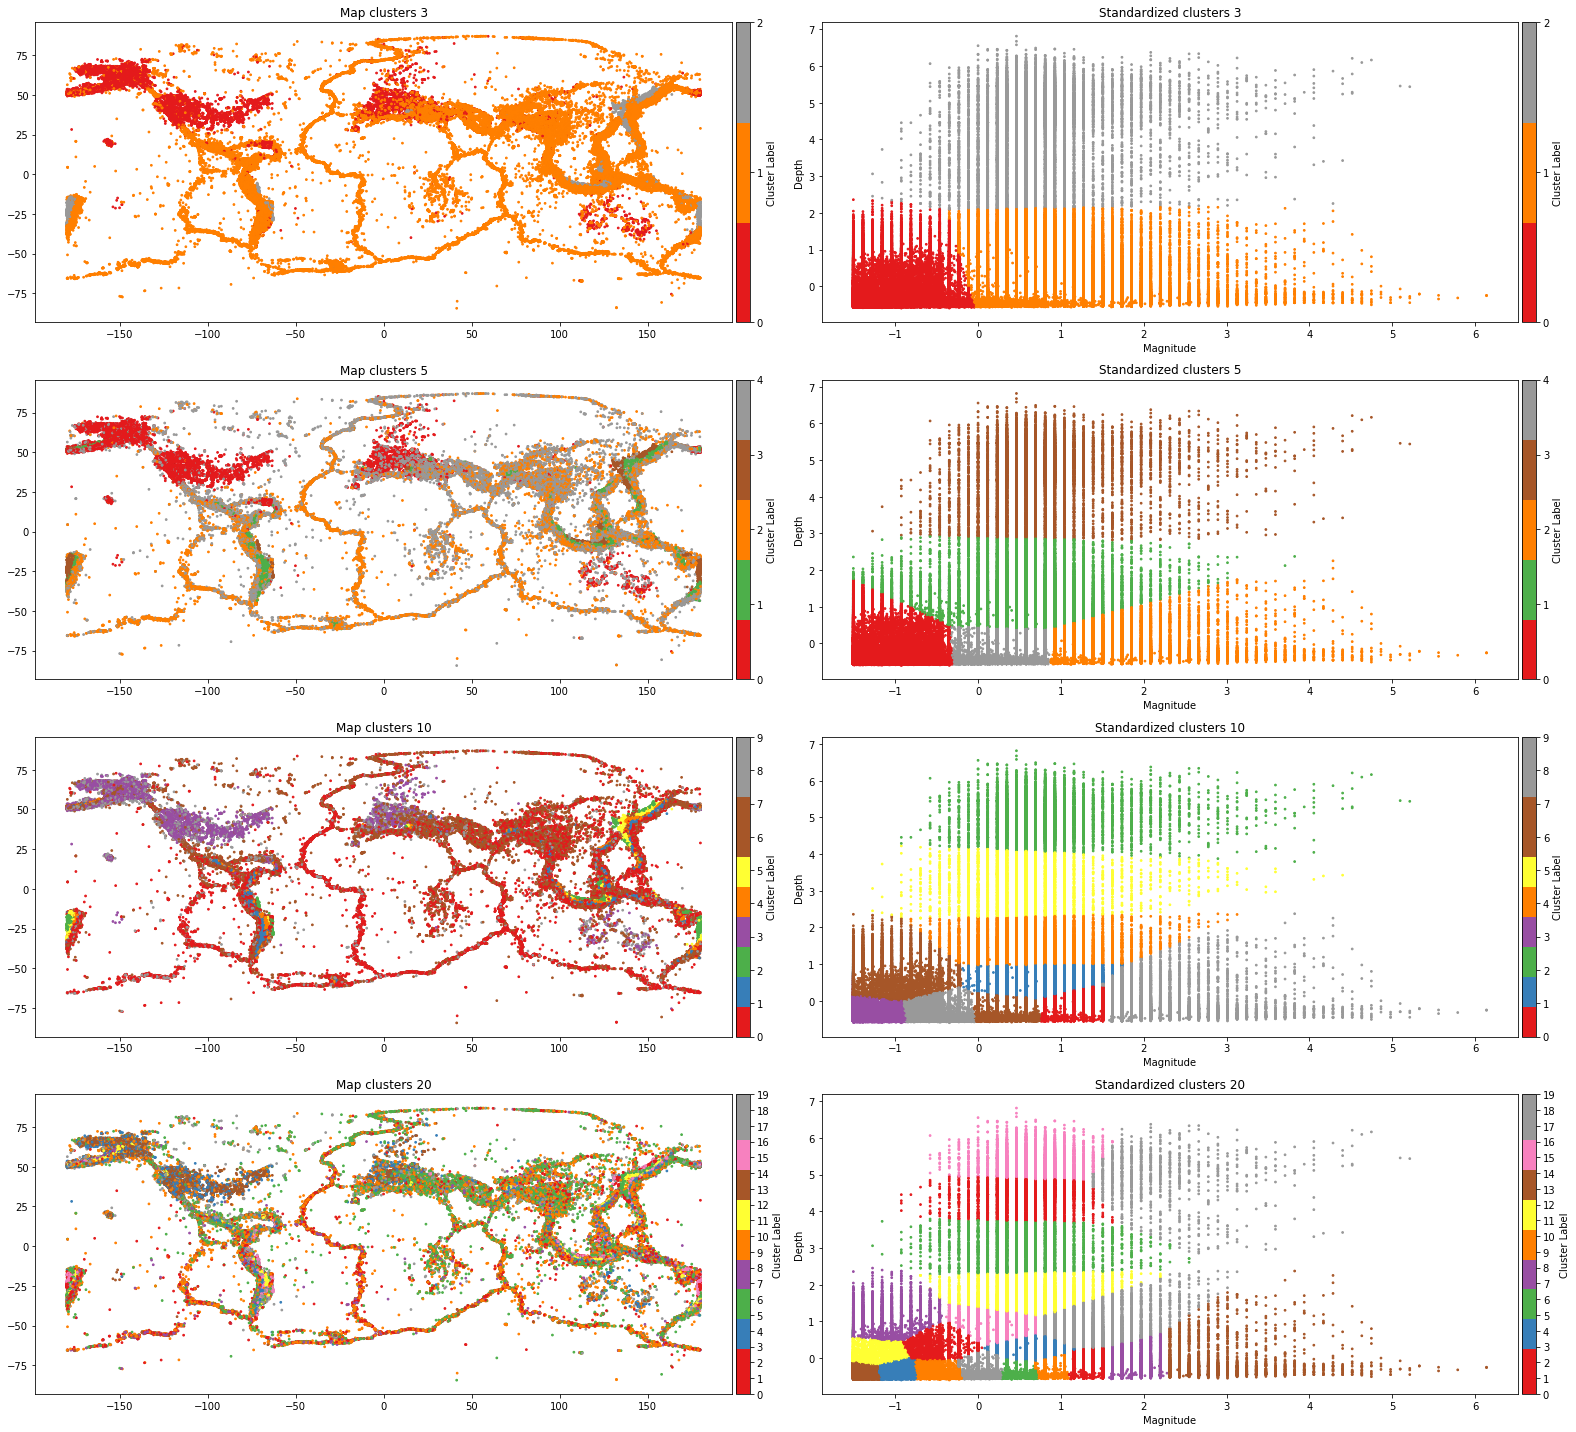

In [172]:
plt.close('all')

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(22, 20))

ax1 = fig.add_subplot(421)
im1 = ax1.scatter(gdf.geometry.x, gdf.geometry.y, c=labels3, s=3, cmap=plt.cm.get_cmap('Set1', n_clusters3))
#divider = make_axes_locatable(ax1)
#cax = divider.append_axes('right', size='3%', pad=0.2)
cb = colorbar_cartopy(ax1, im1)
cb.set_label('Cluster Label')
cb.ax.yaxis.set_ticks(range(n_clusters3))
ax1.title.set_text('Map clusters 3')


ax2 = fig.add_subplot(422)
img2=ax2.scatter(gdf.mag_standard, gdf.depth_standard, c=labels3, s=3, cmap=plt.cm.get_cmap('Set1', n_clusters3))
cb = colorbar_cartopy(ax2, img2)
cb.set_label('Cluster Label')
cb.ax.yaxis.set_ticks(range(n_clusters3))
ax2.set_xlabel('Magnitude')
ax2.set_ylabel('Depth')
ax2.title.set_text('Standardized clusters 3')

ax3 = fig.add_subplot(423)
im3 = ax3.scatter(gdf.geometry.x, gdf.geometry.y, c=labels5, s=3, cmap=plt.cm.get_cmap('Set1', n_clusters5))
cb = colorbar_cartopy(ax3, im3)
cb.ax.yaxis.set_ticks(range(n_clusters5))
ax3.title.set_text('Map clusters 5')
cb.set_label('Cluster Label')

ax4 = fig.add_subplot(424)
img4=ax4.scatter(gdf.mag_standard, gdf.depth_standard, c=labels5, s=3, cmap=plt.cm.get_cmap('Set1', n_clusters5))
cb = colorbar_cartopy(ax4, img4)
cb.set_label('Cluster Label')
cb.ax.yaxis.set_ticks(range(n_clusters5))
ax4.set_xlabel('Magnitude')
ax4.set_ylabel('Depth')
ax4.title.set_text('Standardized clusters 5')

ax5 = fig.add_subplot(425)
im5 = ax5.scatter(gdf.geometry.x, gdf.geometry.y, c=labels10, s=3, cmap=plt.cm.get_cmap('Set1', n_clusters10))
cb = colorbar_cartopy(ax5, im5)
cb.ax.yaxis.set_ticks(range(n_clusters10))
ax5.title.set_text('Map clusters 10')
cb.set_label('Cluster Label')

ax6 = fig.add_subplot(426)
img6=ax6.scatter(gdf.mag_standard, gdf.depth_standard, c=labels10, s=3, cmap=plt.cm.get_cmap('Set1', n_clusters10))
cb = colorbar_cartopy(ax6, img6)
cb.set_label('Cluster Label')
cb.ax.yaxis.set_ticks(range(n_clusters10))
ax6.set_xlabel('Magnitude')
ax6.set_ylabel('Depth')
ax6.title.set_text('Standardized clusters 10')

ax7 = fig.add_subplot(427)
im7 = ax7.scatter(gdf.geometry.x, gdf.geometry.y, c=labels20, s=3, cmap=plt.cm.get_cmap('Set1', n_clusters20))
cb = colorbar_cartopy(ax7, im7)
cb.ax.yaxis.set_ticks(range(n_clusters20))
ax7.title.set_text('Map clusters 20')
cb.set_label('Cluster Label')

ax8 = fig.add_subplot(428)
img8=ax8.scatter(gdf.mag_standard, gdf.depth_standard, c=labels20, s=3, cmap=plt.cm.get_cmap('Set1', n_clusters20))
cb = colorbar_cartopy(ax8, img8)
cb.set_label('Cluster Label')
cb.ax.yaxis.set_ticks(range(n_clusters20))
ax8.set_xlabel('Magnitude')
ax8.set_ylabel('Depth')
ax8.title.set_text('Standardized clusters 20')

fig.tight_layout()

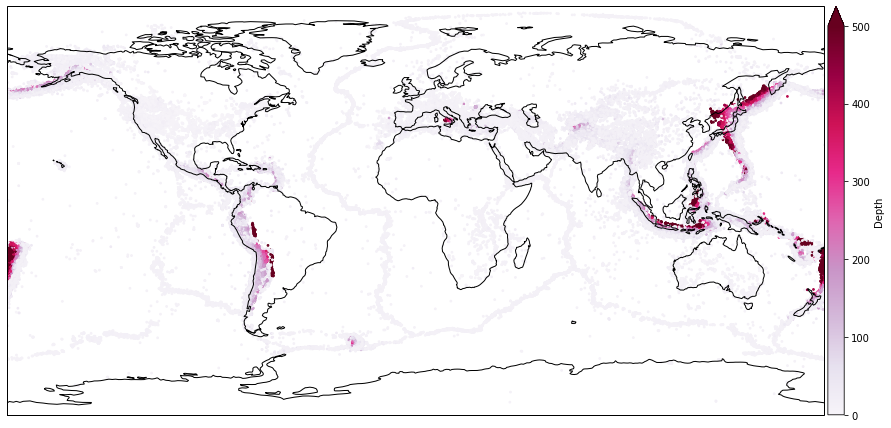

In [173]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf.depth, s=3, vmin=0, vmax=500, cmap=plt.cm.PuRd)
cb = colorbar_cartopy(ax, img, extend='max')
cb.set_label('Depth')

The choice of clusters depends mainly on the study for which we use them. The type of study and the scientific questions that need to be answered determine how many clusters should be used. In other words,we choose the number of clusters according to how satisfactory our  visual results are, in relation to the questions that need to be answered. Moreover, it has to be under consideration the parameters that we used in order export the classes. In our case, our parameteres were the magnitude and the depth. This is a factor that helps us to interpret the different K-means clustering (partitional clustering). The clustering, group a number of sections that they display similar features. The large number of clusters seperate earthquakes that contain similar fetaures as a result many events that experience similar characteristics to be in different groups. In our case the best option in terms of the number of clusters, according to the visula interpretation, is approximately 10. An other approach could be the optimazation using the least square method

**Question 2: Choose a small spatial area (for example, California, Japan, or Turkey all have lots of earthquakes in relatively small areas), and perform spatial clustering (Moran’s I and Getis-Ord G) based on depth and on magnitude (e.g., two different clusterings). Try different alpha and threshold values, and different weighting schemes (e.g., https://pysal.org/libpysal/api.html#spatial-weights). How do they impact your clusters? What weighting scheme do you think is the most appropriate for this dataset? (25 points).**

**Load data**

In [107]:
import json
import pandas as pd
import numpy as np
import geopandas as gpd
crs = {'init': 'epsg:4326'}
import shapely.wkt
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm

df = pd.read_csv('USGS_Quakes_2009-2019.csv', usecols=['geometry', 'mag'])
geom = [shapely.wkt.loads(wkt) for wkt in df.geometry.values]
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geom)
gdf['depth'] = list(map(lambda x: x.z, geom))
gdf = gdf[gdf.mag > 2.5]

**Select area and buffer**

In [ ]:
pop_gdf = gpd.read_file('ne_10m_populated_places.shp')
pop_gdf = pop_gdf[['NAME', 'geometry']]

country = pop_gdf[pop_gdf.NAME=='Patra'].copy()
radius=20
country['NAME'] ='Gr'
country['geometry'] = country.geometry.buffer(radius)
points_in_region = gpd.sjoin(gdf, country, how='inner', op='intersects')
#points_in_region.plot()

**A) Spatial clustering based on magnitude**

**1) DistanceBand, threshold=3, alpha=-2**

In [ ]:
import pysal
threshold = 3 #Limit of 3dd between related values
alpha = -2 #Weights decay at a squared rate
W1 = pysal.lib.weights.distance.DistanceBand.from_dataframe(points_in_region, threshold=threshold, alpha=alpha, binary=False, build_sp=False, ids=points_in_region.index)

In [111]:
def colorbar_cartopy(mappable, cmap, **kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)   
    cax = divider.append_axes("right", size="2%", pad=0.05, axes_class=plt.Axes, autoscale_on=False)
    obj = fig.colorbar(cmap, cax=cax, **kwargs)
    return obj 

In [112]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
y = points_in_region.mag
y =  (y - np.nanmean(y)) / np.nanstd(y)
m1 = Moran_Local(y, W1, transformation='R', permutations=999)
I1 = m1.Is
I1[m1.p_sim > 0.05] = np.nan

In [113]:
from esda.getisord import G_Local
g1 = G_Local(y, W1, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Z1 = g1.Zs
Z1[g1.p_sim > 0.05] = np.nan

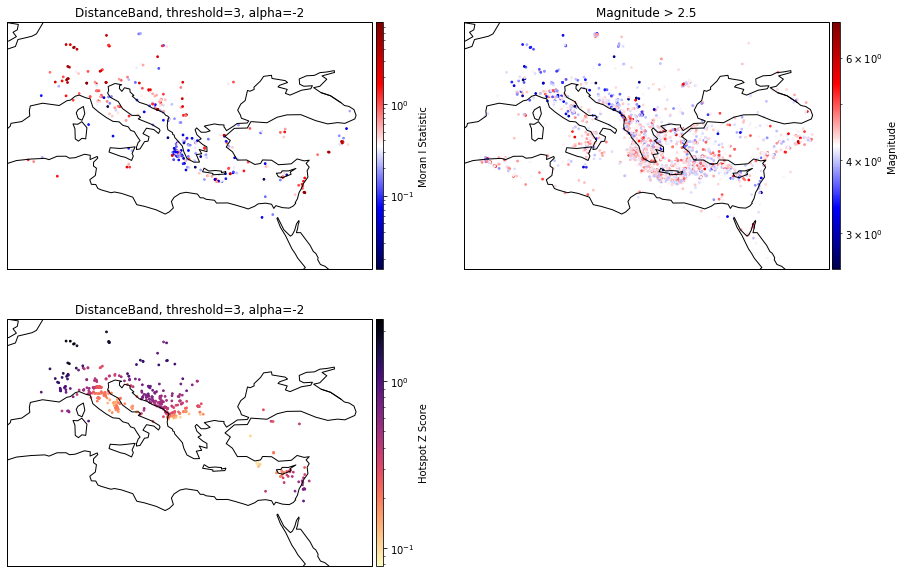

In [114]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=I1, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Moran I Statistic')
ax.title.set_text('DistanceBand, threshold=3, alpha=-2')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=points_in_region.mag, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Magnitude')
ax.title.set_text('Magnitude > 2.5')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Z1, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Hotspot Z Score')
ax.title.set_text('DistanceBand, threshold=3, alpha=-2')

**2) DistanceBand, threshold =2 alpha=-2**

In [ ]:
import pysal
threshold = 2 #Limit of 3dd between related values
alpha = -2 #Weights decay at a squared rate
W2 = pysal.lib.weights.distance.DistanceBand.from_dataframe(points_in_region, threshold=threshold, alpha=alpha, binary=False, build_sp=False, ids=points_in_region.index)

In [ ]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
y = points_in_region.mag
y =  (y - np.nanmean(y)) / np.nanstd(y)
m2 = Moran_Local(y, W2, transformation='R', permutations=999)
I2 = m2.Is
I2[m2.p_sim > 0.05] = np.nan

In [117]:
from esda.getisord import G_Local
g2 = G_Local(y, W2, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Z2 = g2.Zs
Z2[g2.p_sim > 0.05] = np.nan

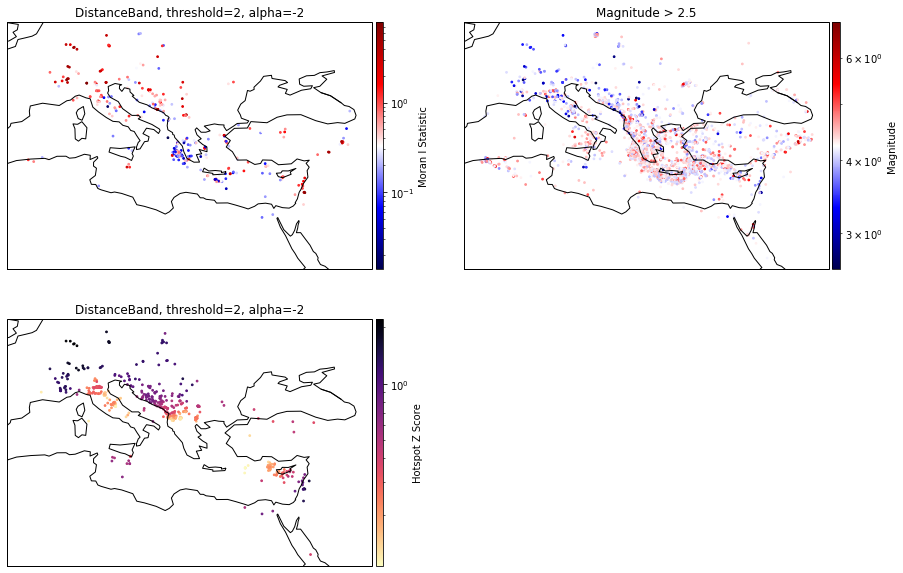

In [118]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
img2 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=I2, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img2)
cb.set_label('Moran I Statistic')
ax.title.set_text('DistanceBand, threshold=2, alpha=-2')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img2 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=points_in_region.mag, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img2)
cb.set_label('Magnitude')
ax.title.set_text('Magnitude > 2.5')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img2 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Z2, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img2)
cb.set_label('Hotspot Z Score')
ax.title.set_text('DistanceBand, threshold=2, alpha=-2')


**3) DistanceBand, threshold =0.5 alpha=-1**

In [ ]:
import pysal
threshold3 = 0.5#Limit of 3dd between related values
alpha3 = -1 #Weights decay at a squared rate
W3 = pysal.lib.weights.distance.DistanceBand.from_dataframe(points_in_region, threshold=threshold3, alpha=alpha3, binary=False, build_sp=False, ids=points_in_region.index)

In [ ]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
y3 = points_in_region.mag
y3 =  (y3 - np.nanmean(y3)) / np.nanstd(y3)
m3 = Moran_Local(y3, W3, transformation='R', permutations=999)
I3 = m3.Is
I3[m3.p_sim > 0.05] = np.nan

In [121]:
from esda.getisord import G_Local
g3 = G_Local(y3, W3, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Z3 = g3.Zs
Z3[g3.p_sim > 0.05] = np.nan

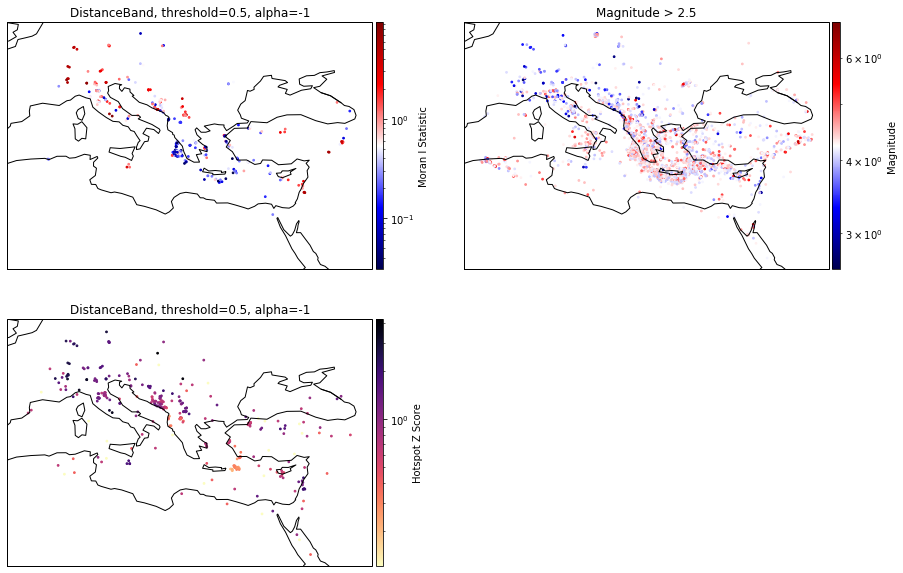

In [122]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
img3 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=I3, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img3)
cb.set_label('Moran I Statistic')
ax.title.set_text('DistanceBand, threshold=0.5, alpha=-1')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img3 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=points_in_region.mag, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img3)
cb.set_label('Magnitude')
ax.title.set_text('Magnitude > 2.5')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img3 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Z3, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img3)
cb.set_label('Hotspot Z Score')
ax.title.set_text('DistanceBand, threshold=0.5, alpha=-1')

**4) DistanceBand, threshold=0.5, alpha=-5**

In [123]:
import pysal
threshold4 = 0.5#Limit of 3dd between related values
alpha4 = -5 #Weights decay at a squared rate
W4 = pysal.lib.weights.distance.DistanceBand.from_dataframe(points_in_region, threshold=threshold4, alpha=alpha4, binary=False, build_sp=False, ids=points_in_region.index)

In [ ]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
y4 = points_in_region.mag
y4 =  (y4 - np.nanmean(y4)) / np.nanstd(y4)
m4 = Moran_Local(y4, W4, transformation='R', permutations=999)
I4 = m4.Is
I4[m4.p_sim > 0.05] = np.nan

In [125]:
from esda.getisord import G_Local
g4 = G_Local(y4, W4, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Z4 = g4.Zs
Z4[g4.p_sim > 0.05] = np.nan

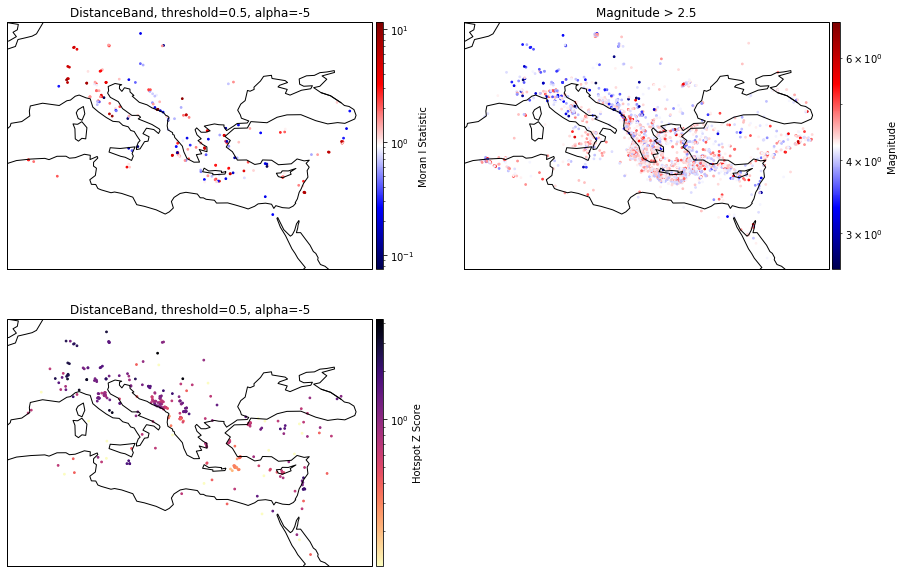

In [126]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
img4 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=I4, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img4)
cb.set_label('Moran I Statistic')
ax.title.set_text('DistanceBand, threshold=0.5, alpha=-5')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img4 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=points_in_region.mag, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img4)
cb.set_label('Magnitude')
ax.title.set_text('Magnitude > 2.5')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img4 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Z4, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img4)
cb.set_label('Hotspot Z Score')
ax.title.set_text('DistanceBand, threshold=0.5, alpha=-5')

**5) DistanceBand, threshold=0.5 alpha=-2**

In [ ]:
import pysal
threshold5 = 0.2#Limit of 3dd between related values
alpha5 = -2 #Weights decay at a squared rate
W5 = pysal.lib.weights.distance.DistanceBand.from_dataframe(points_in_region, threshold=threshold5, alpha=alpha5, binary=False, build_sp=False, ids=points_in_region.index)

In [ ]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
y5 = points_in_region.mag
y5 =  (y5 - np.nanmean(y5)) / np.nanstd(y5)
m5 = Moran_Local(y5, W5, transformation='R', permutations=999)
I5 = m5.Is
I5[m5.p_sim > 0.05] = np.nan

In [129]:
from esda.getisord import G_Local
g5 = G_Local(y5, W5, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Z5 = g5.Zs
Z5[g5.p_sim > 0.05] = np.nan

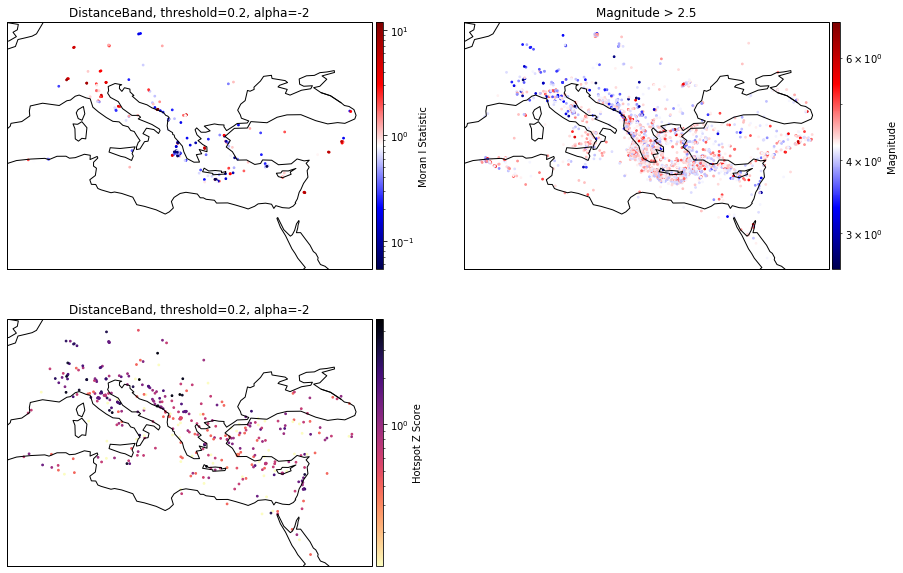

In [130]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
img5 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=I5, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img5)
cb.set_label('Moran I Statistic')
ax.title.set_text('DistanceBand, threshold=0.2, alpha=-2')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img5 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=points_in_region.mag, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img5)
cb.set_label('Magnitude')
ax.title.set_text('Magnitude > 2.5')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img5 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Z5, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img5)
cb.set_label('Hotspot Z Score')
ax.title.set_text('DistanceBand, threshold=0.2, alpha=-2')

**B) Spatial clustering based on depth**

**W = W1 DistanceBand, threshold=3, alpha=-2**

In [131]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
yd= points_in_region.depth
yd =  (yd - np.nanmean(yd)) / np.nanstd(yd)
md1 = Moran_Local(yd, W1, transformation='R', permutations=999)
Id1 = md1.Is

In [132]:
Id1[md1.p_sim > 0.05] = np.nan

In [133]:
from esda.getisord import G_Local
gd1 = G_Local(yd, W1, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Zd1 = gd1.Zs
Zd1[gd1.p_sim > 0.05] = np.nan

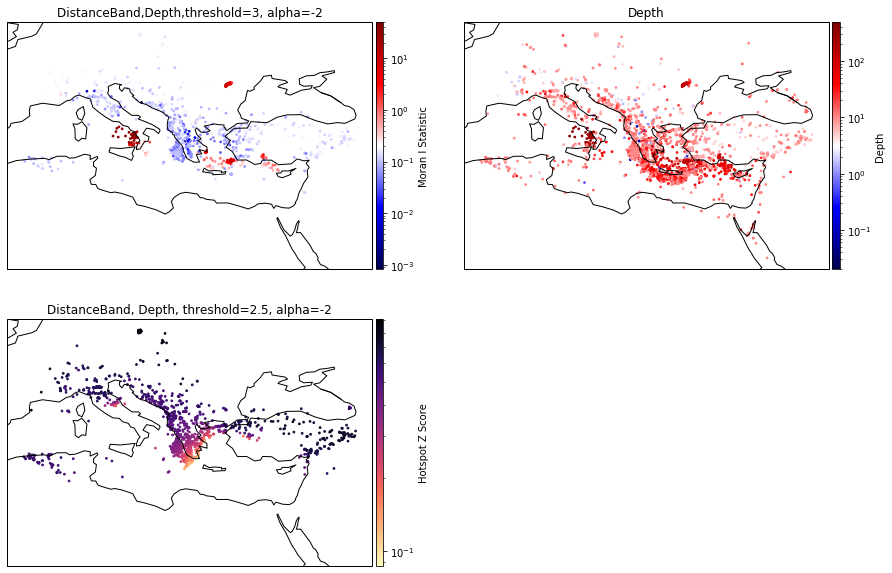

In [134]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
imgd = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Id1, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd)
cb.set_label('Moran I Statistic')
ax.title.set_text('DistanceBand,Depth,threshold=3, alpha=-2')


ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img5 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=points_in_region.depth, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img5)
cb.set_label('Depth')
ax.title.set_text('Depth')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img5 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Zd1, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img5)
cb.set_label('Hotspot Z Score')
ax.title.set_text('DistanceBand, Depth, threshold=2.5, alpha=-2')

**W = W2, DistanceBand, threshold =2 alpha=-2**

In [135]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
yd2 = points_in_region.depth
yd2 =  (yd2 - np.nanmean(yd2)) / np.nanstd(yd2)
md2 = Moran_Local(yd2, W2, transformation='R', permutations=999)
Id2 = md2.Is
Id2[md2.p_sim > 0.05] = np.nan

In [136]:
from esda.getisord import G_Local
gd2 = G_Local(yd2, W2, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Zd2 = gd2.Zs
Zd2[gd2.p_sim > 0.05] = np.nan

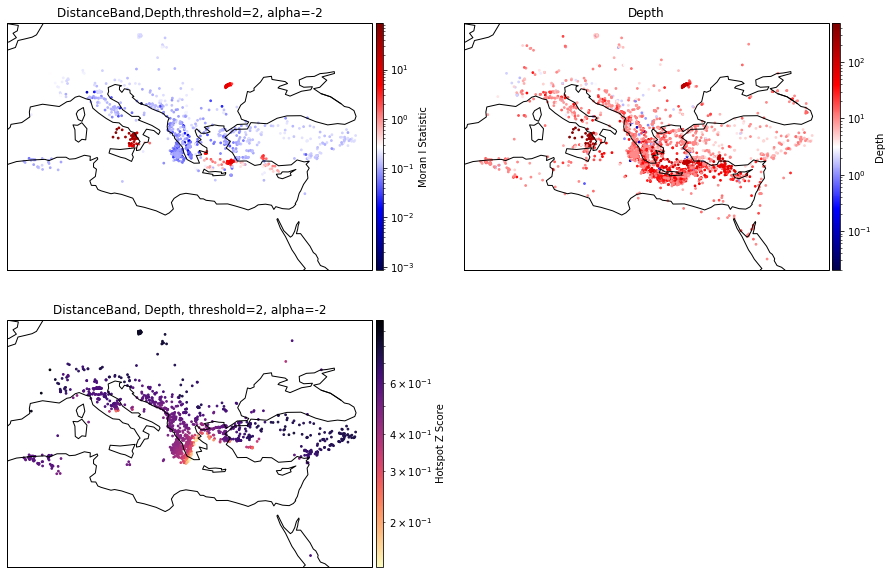

In [137]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
imgd2 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Id2, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd2)
cb.set_label('Moran I Statistic')
ax.title.set_text('DistanceBand,Depth,threshold=2, alpha=-2')


ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
imgd2 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=points_in_region.depth, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd2)
cb.set_label('Depth')
ax.title.set_text('Depth')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
imgd2 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Zd2, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd2)
cb.set_label('Hotspot Z Score')
ax.title.set_text('DistanceBand, Depth, threshold=2, alpha=-2')

**W = W3, DistanceBand,  threshold =0.5 alpha=-1**

In [138]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
yd3 = points_in_region.depth
yd3 =  (yd3 - np.nanmean(yd3)) / np.nanstd(yd3)
md3 = Moran_Local(yd3, W3, transformation='R', permutations=999)
Id3 = md3.Is
Id3[md3.p_sim > 0.05] = np.nan

In [139]:
from esda.getisord import G_Local
gd3 = G_Local(yd3, W3, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Zd3 = gd3.Zs
Zd3[gd3.p_sim > 0.05] = np.nan

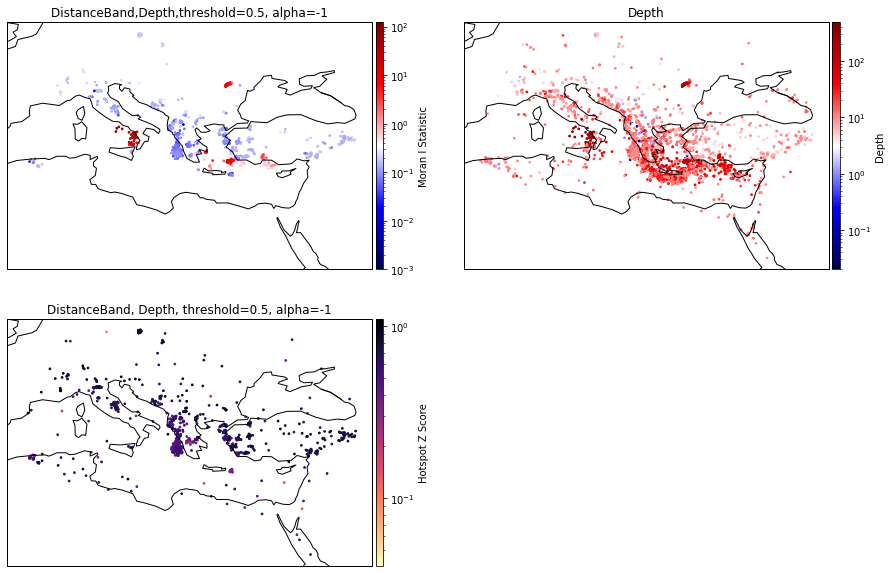

In [140]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
imgd3 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Id3, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd3)
cb.set_label('Moran I Statistic')
ax.title.set_text('DistanceBand,Depth,threshold=0.5, alpha=-1')


ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
imgd3 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=points_in_region.depth, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd3)
cb.set_label('Depth')
ax.title.set_text('Depth')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
imgd3 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Zd3, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd3)
cb.set_label('Hotspot Z Score')
ax.title.set_text('DistanceBand, Depth, threshold=0.5, alpha=-1')

**W = W4, DistanceBand,  threshold=0.5, alpha=-5**

In [141]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
yd4 = points_in_region.depth
yd4 =  (yd4 - np.nanmean(yd4)) / np.nanstd(yd4)
md4 = Moran_Local(yd4, W4, transformation='R', permutations=999)
Id4 = md4.Is
Id4[md4.p_sim > 0.05] = np.nan

In [142]:
from esda.getisord import G_Local
gd4 = G_Local(yd4, W4, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Zd4 = gd4.Zs
Zd4[gd4.p_sim > 0.05] = np.nan

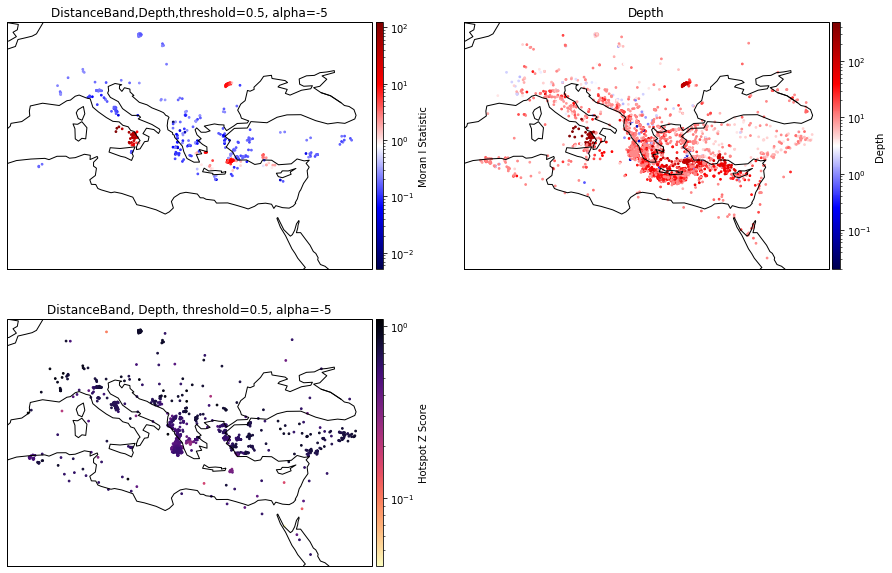

In [143]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
imgd4 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Id4, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd4)
cb.set_label('Moran I Statistic')
ax.title.set_text('DistanceBand,Depth,threshold=0.5, alpha=-5')


ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
imgd4 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=points_in_region.depth, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd4)
cb.set_label('Depth')
ax.title.set_text('Depth')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
imgd4 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Zd4, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd4)
cb.set_label('Hotspot Z Score')
ax.title.set_text('DistanceBand, Depth, threshold=0.5, alpha=-5')

**W = W5, DistanceBand, threshold=0.5 alpha=-2**

In [144]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
yd5 = points_in_region.depth
yd5 =  (yd5 - np.nanmean(yd5)) / np.nanstd(yd5)
md5 = Moran_Local(yd5, W5, transformation='R', permutations=999)
Id5 = md5.Is
Id5[md5.p_sim > 0.05] = np.nan

In [145]:
from esda.getisord import G_Local
gd5 = G_Local(yd5, W5, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Zd5 = gd5.Zs
Zd5[gd5.p_sim > 0.05] = np.nan

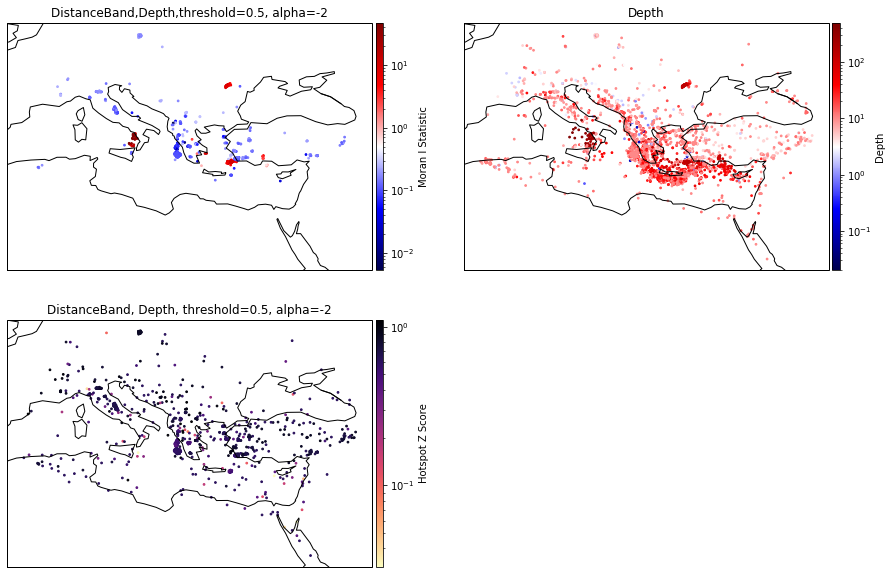

In [146]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
imgd5 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Id5, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd5)
cb.set_label('Moran I Statistic')
ax.title.set_text('DistanceBand,Depth,threshold=0.5, alpha=-2')


ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
imgd5 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=points_in_region.depth, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd5)
cb.set_label('Depth')
ax.title.set_text('Depth')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
imgd5 = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Zd5, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, imgd5)
cb.set_label('Hotspot Z Score')
ax.title.set_text('DistanceBand, Depth, threshold=0.5, alpha=-2')

**Queen**

In [147]:
import libpysal
ws = libpysal.weights.Queen.from_dataframe(points_in_region)

**A) Queen Magnitude**

In [157]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
y= sub_gdf.mag
y =  (y - np.nanmean(y)) / np.nanstd(y)
ms = Moran_Local(y, ws, transformation='R', permutations=999)
Is = ms.Is

In [158]:
Is[ms.p_sim > 0.05] = np.nan

In [159]:
from esda.getisord import G_Local
gs = G_Local(y, ws, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Zs = gs.Zs
Zs[gs.p_sim > 0.05] = np.nan

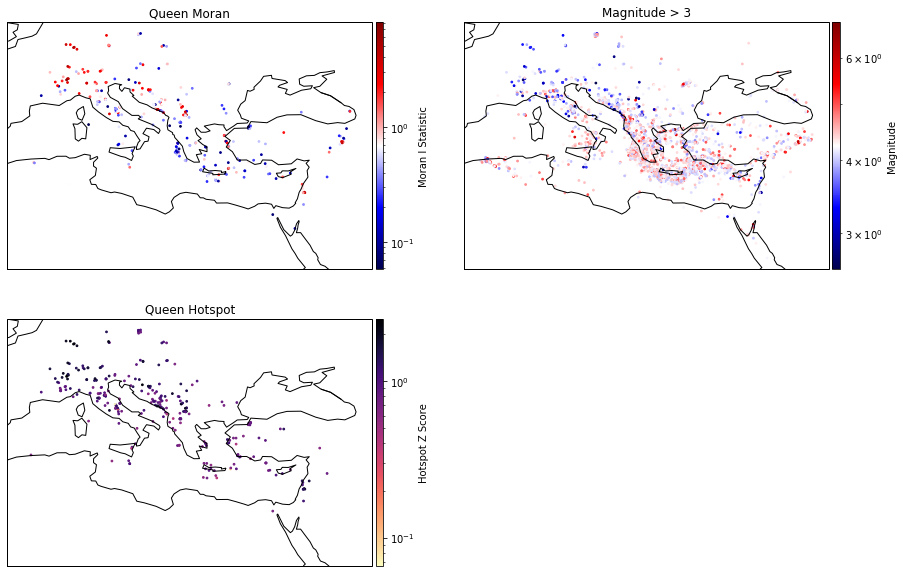

In [161]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=Is, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Moran I Statistic')
ax.title.set_text('Queen Moran')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=points_in_region.mag, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Magnitude')
ax.title.set_text('Magnitude > 3')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Zs, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Hotspot Z Score')
ax.title.set_text('Queen Hotspot')

**B) Queen Depth**

In [189]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
y= sub_gdf.depth
y =  (y - np.nanmean(y)) / np.nanstd(y)
ms = Moran_Local(y, ws, transformation='R', permutations=999)
Is = ms.Is

In [190]:
Is[ms.p_sim > 0.05] = np.nan

In [191]:
from esda.getisord import G_Local
gs = G_Local(y, ws, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Zs = gs.Zs
Zs[gs.p_sim > 0.05] = np.nan

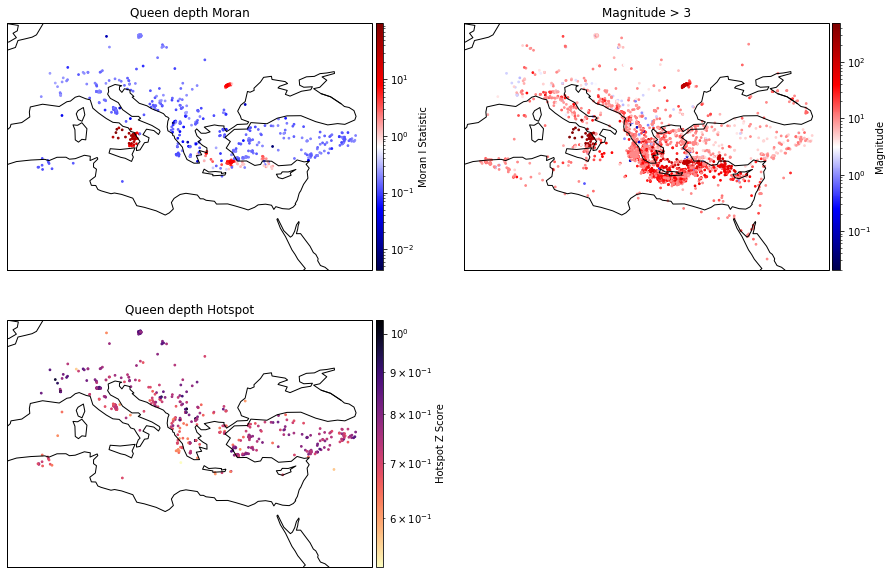

In [192]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=Is, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Moran I Statistic')
ax.title.set_text('Queen depth Moran')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=points_in_region.depth, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Magnitude')
ax.title.set_text('Magnitude > 3')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Zs, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Hotspot Z Score')
ax.title.set_text('Queen depth Hotspot')

**KNN**

In [ ]:
import libpysal
wk = libpysal.weights.KNN.from_dataframe(points_in_region,k=3,p=2,ids=points_in_region.index,radius=None,distance_metric='euclidean')

**A) KNN Magnitude**

In [153]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
y= sub_gdf.mag
y =  (y - np.nanmean(y)) / np.nanstd(y)
mk = Moran_Local(y, wk, transformation='R', permutations=999)
Ik = mk.Is

In [154]:
Ik[mk.p_sim > 0.05] = np.nan

In [155]:
from esda.getisord import G_Local
gk = G_Local(y, wk, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Zk = gk.Zs
Zk[gk.p_sim > 0.05] = np.nan

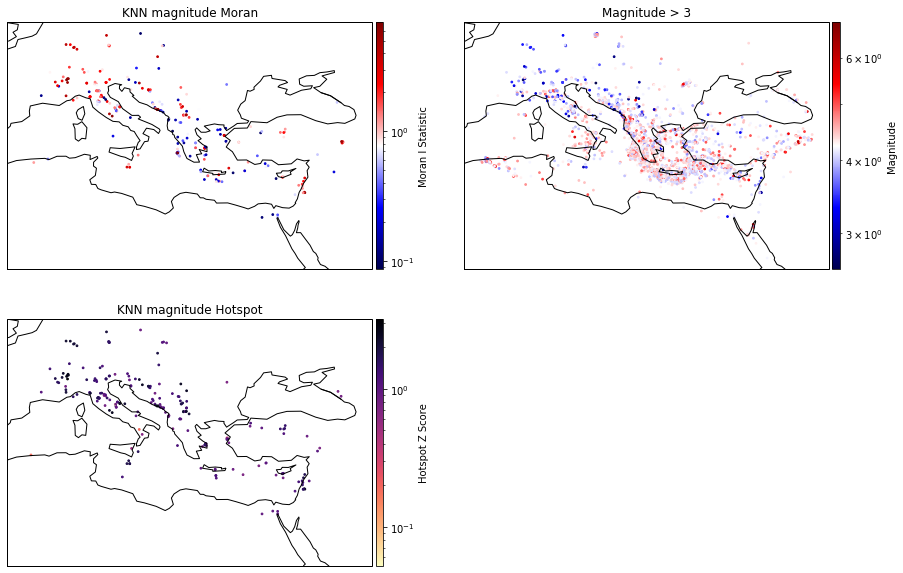

In [180]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=Ik, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Moran I Statistic')
ax.title.set_text('KNN magnitude Moran')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=points_in_region.mag, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Magnitude')
ax.title.set_text('Magnitude > 3')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Zk, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Hotspot Z Score')
ax.title.set_text('KNN magnitude Hotspot')

**B) KNN Depth**

In [174]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
yd= sub_gdf.depth
yd =  (yd - np.nanmean(yd)) / np.nanstd(yd)
mkd = Moran_Local(yd, wk, transformation='R', permutations=999)
Ikd = mkd.Is

In [175]:
Ikd[mkd.p_sim > 0.05] = np.nan

In [176]:
from esda.getisord import G_Local
gkd = G_Local(yd, wk, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Zkd = gkd.Zs
Zkd[gkd.p_sim > 0.05] = np.nan

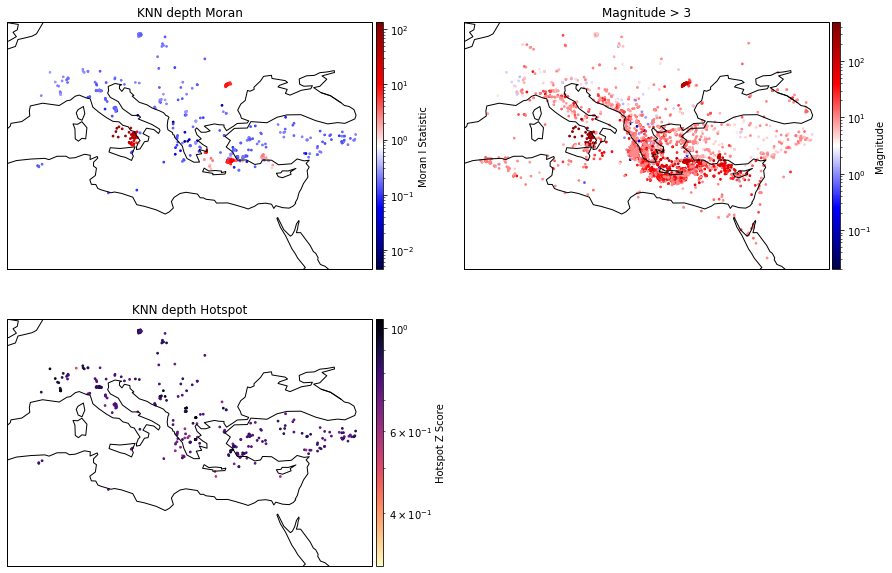

In [179]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=Ikd, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Moran I Statistic')
ax.title.set_text('KNN depth Moran')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=points_in_region.depth, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Magnitude')
ax.title.set_text('Magnitude > 3')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Zkd, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Hotspot Z Score')
ax.title.set_text('KNN depth Hotspot')

**Kernel**

In [164]:
import libpysal
wke = libpysal.weights.Kernel.from_dataframe(points_in_region,bandwidth=None, fixed=True, k=2, function='triangular', eps=1.0000001, ids=None, diagonal=False, distance_metric='euclidean', radius=None)

**A) Kernel magnitude**

In [165]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
y= sub_gdf.mag
y =  (y - np.nanmean(y)) / np.nanstd(y)
mke = Moran_Local(y, wke, transformation='R', permutations=999)
Ike = mke.Is

In [181]:
Ike[mke.p_sim > 0.05] = np.nan

In [182]:
from esda.getisord import G_Local
gke = G_Local(y, wke, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Zke = gke.Zs
Zke[gke.p_sim > 0.05] = np.nan

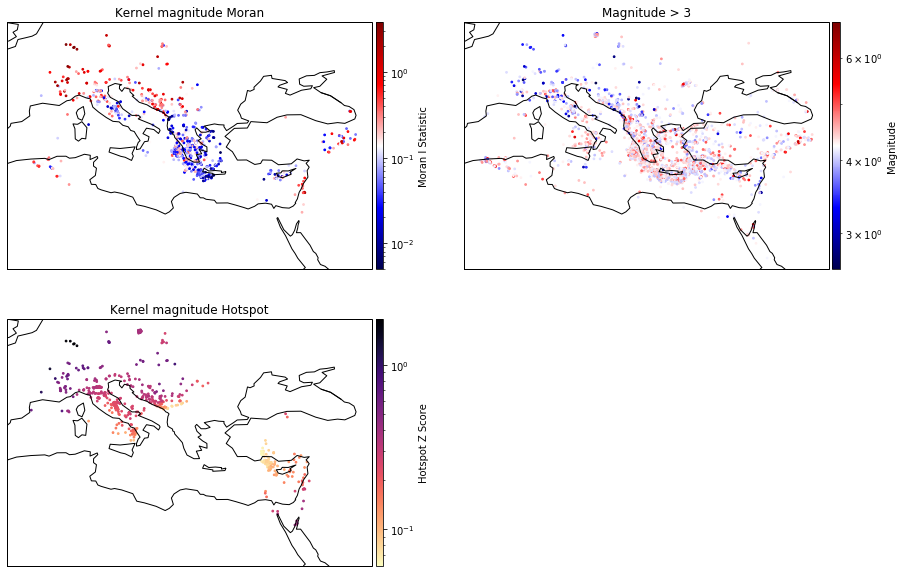

In [183]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=Ike, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Moran I Statistic')
ax.title.set_text('Kernel magnitude Moran')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=points_in_region.mag, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Magnitude')
ax.title.set_text('Magnitude > 3')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Zke, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Hotspot Z Score')
ax.title.set_text('Kernel magnitude Hotspot')

**B) Kernel Depth**

In [193]:
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
y= sub_gdf.depth
y =  (y - np.nanmean(y)) / np.nanstd(y)
mked = Moran_Local(y, wke, transformation='R', permutations=999)
Iked = mked.Is

In [186]:
Iked[mked.p_sim > 0.05] = np.nan

In [187]:
from esda.getisord import G_Local
gked = G_Local(y, wke, transform='R', permutations=999, star=True) #STAR FORCES THINGS THROUGH BINARY
Zked = gked.Zs
Zked[gked.p_sim > 0.05] = np.nan

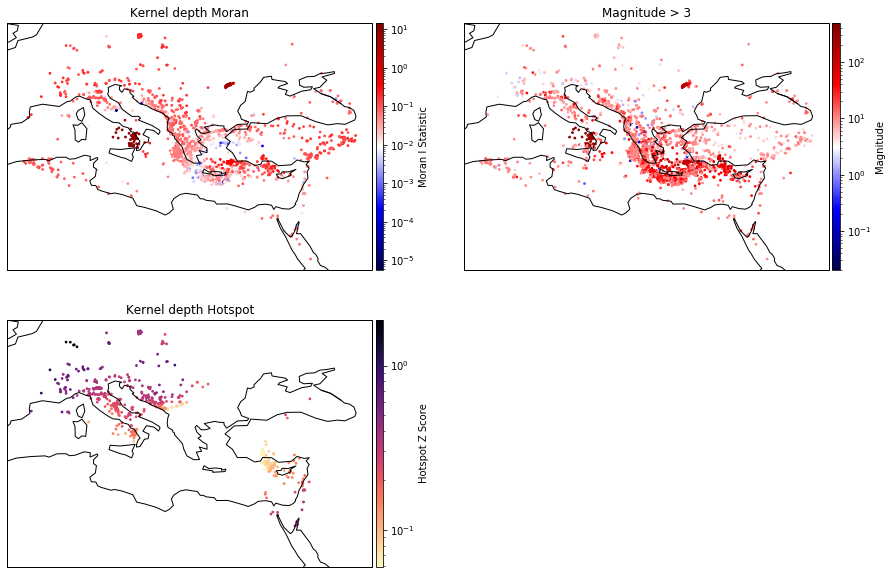

In [194]:
plt.close('all')
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=Iked, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Moran I Statistic')
ax.title.set_text('Kernel depth Moran')

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x,points_in_region.geometry.y, c=points_in_region.depth, s=3, cmap=plt.cm.seismic, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Magnitude')
ax.title.set_text('Magnitude > 3')

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
ax.coastlines()
img = ax.scatter(points_in_region.geometry.x, points_in_region.geometry.y, c=Zked, s=3, cmap=plt.cm.magma_r, norm=LogNorm())
cb = colorbar_cartopy(ax, img)
cb.set_label('Hotspot Z Score')
ax.title.set_text('Kernel depth Hotspot')

In order to interpret the results of the different clusters we have to keep in mind the tectonic characteristics of the wider area. The Greek bow (Aegean bow) is the contact boundary of the Eurasian lithosphere plate - part of which is the Aegean - and the African plate - part of which is the lithosphere of the East Mediterranean. The main fault (bow) that experiences high frequence and high magnitude of earthquakes starts from the island of Cephalonia, crosses the bottom of the Southern Ionian Sea outside the Peloponnese and passing south of Crete ends in Rhodes. It is interesting, based on this observation, to see which of the above classifications best describes the spatial distribution of earthquakes, taking into account their depth and size.

It has to be mentioned that in this clustering it was used the file "USGS_Quakes_2009-2019.csv".The file "USGS_Quakes_1999-2019.csv" gave more reliable results in terms of the weighting scheme of the DistanceBand but it was impossible to run the algorithms of Kernel, Queen and KNN in my pc.

Regarding the DistanceBand the lower values of alpha and threshold (case 3, threshold 0.5, alpha=-1) seems to produce more representative clusters. The higher values cause errors that are obvious in Hotspot Z Score map. Moreover the Hotspot Z Score maps based on the depth represent better the spatial distribution of faults (in all cases). For instance, in the same case 3 of DistanceBand, the Hotspot Z Score map based on magnitude has excluded the main fault West of Peloponnese. For the dataset "USGS_Quakes_2009-2019.csv" the Queen weight scheme is the most appropriate because both Hotspot Z Score and Moran I Statistic better represent the tectonic state and the grouping of earthquakes based on size and depth, in the eastern Mediterranean. I would like to mention that the results would be different according the bigger dataset "USGS_Quakes_1999-2019.csv"not only because of the greater number of earthquakes they contain but also because during this period large earthquakes occurred.